In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation as animation
import datetime
import seaborn as sns
import missingno as msno
import firebase_admin
import pygwalker as pyg
from firebase_admin import credentials, db
from datetime import datetime  # Untuk konversi timestamp ke human-readable
sns.set_theme(style="whitegrid")
%matplotlib inline 

In [2]:
# Konfigurasi database sumber
source_cred = credentials.Certificate("D:/staklimjerukagung-firebase-adminsdk-kcfma-e091165a9b.json")
firebase_admin.initialize_app(source_cred, {
    'databaseURL': 'https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/'
})

In [3]:
# Input readable date
start_readable_date = "01-06-2025 00:00:00"  # Format: DD-MM-YYYY HH:MM:SS
end_readable_date = "30-06-2025 23:59:59"  # Format: DD-MM-YYYY HH:MM:SS

# Convert readable date to Unix timestamp
start_timestamp = int(datetime.strptime(start_readable_date, "%d-%m-%Y %H:%M:%S").timestamp())
print(start_timestamp) # Convert to string and print
end_timestamp = int(datetime.strptime(end_readable_date, "%d-%m-%Y %H:%M:%S").timestamp())
print(end_timestamp) # Convert to string and print


1748710800
1751302799


In [4]:
# Refer ke path data
ref_data1 = db.reference('/auto_weather_stat/id-03/data')
ref_data2 = db.reference('/auto_weather_stat/id-05/data')

# Ambil data yang key-nya berada dalam rentang waktu yang ditentukan
query_data1 = ref_data1.order_by_key().start_at(str(start_timestamp)).end_at(str(end_timestamp))
query_data2 = ref_data2.order_by_key().start_at(str(start_timestamp)).end_at(str(end_timestamp))

# Ambil hasil
results_data1 = query_data1.get()
results_data2 = query_data2.get()

In [5]:
# Mengubah data menjadi DataFrame pandas untuk data pertama
if results_data1:
    cuaca1 = pd.DataFrame.from_dict(results_data1, orient='index')
    
    # Jika 'timestamp' sudah ada, jangan pindahkan indeks ke kolom
    if 'timestamp' not in cuaca1.columns:
        cuaca1.index.name = 'timestamp'  # Mengatur nama indeks
        cuaca1.reset_index(inplace=True)  # Memindahkan indeks menjadi kolom biasa
    
    print("Data dari sumber pertama:")
    print(cuaca1.head())  # Menampilkan data untuk verifikasi
else:
    print("Tidak ada data dari sumber pertama")

# Mengubah data menjadi DataFrame pandas untuk data kedua
if results_data2:
    cuaca2 = pd.DataFrame.from_dict(results_data2, orient='index')
    
    # Jika 'timestamp' sudah ada, jangan pindahkan indeks ke kolom
    if 'timestamp' not in cuaca2.columns:
        cuaca2.index.name = 'timestamp'  # Mengatur nama indeks
        cuaca2.reset_index(inplace=True)  # Memindahkan indeks menjadi kolom biasa
    
    print("Data dari sumber kedua:")
    print(cuaca2.head())  # Menampilkan data untuk verifikasi
else:
    print("Tidak ada data dari sumber kedua")

Data dari sumber pertama:
                 dew  humidity  pressure  temperature   timestamp  volt
1748710856  25.35366     97.79   1013.13        25.73  1748710856  4.12
1748710916  25.35194     97.78   1013.22        25.73  1748710916  4.11
1748710976  25.28523     97.74   1013.11        25.67  1748710976  4.12
1748711036  25.28832     97.70   1013.15        25.68  1748711036  4.12
1748711096  25.25153     97.66   1013.16        25.65  1748711096  4.12
Data dari sumber kedua:
                 dew  humidity  pressure  rainfall  rainrate  temperature  \
1748710823  25.72175  94.82208   1014.18    5.0292       0.0     26.62356   
1748710883  25.69910  94.79919   1014.18    5.0292       0.0     26.60487   
1748710943  25.70956  94.91745   1014.16    5.0292       0.0     26.59418   
1748711003  25.63700  94.62943   1014.17    5.0292       0.0     26.57282   
1748711063  25.64677  94.96704   1014.20    5.0292       0.0     26.52209   

             timestamp     volt  
1748710823  174871082

In [6]:
cuaca1.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt
1750424768,25.13238,93.42,1013.09,26.28,1750424768,4.10
1750424828,25.13145,93.47,1013.18,26.27,1750424828,4.11
1750424888,25.09991,93.46,1013.15,26.24,1750424888,4.11
1750424948,25.11435,93.43,1013.17,26.26,1750424948,4.11
1750425008,25.10264,93.42,1013.22,26.25,1750425008,4.11
1750425068,25.12247,93.42,1013.17,26.27,1750425068,4.11
1750425128,25.08733,93.39,1013.21,26.24,1750425128,4.10
1750425248,25.10170,93.47,1013.28,26.24,1750425248,4.11
1750425308,25.09623,93.55,1013.22,26.22,1750425308,4.11
1750425368,25.12766,93.67,1013.21,26.23,1750425368,4.11


In [7]:
cuaca1['timestamp']= cuaca1['timestamp'].astype(int)
cuaca2['timestamp']= cuaca2['timestamp'].astype(int)
cuaca1.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt
1750424768,25.13238,93.42,1013.09,26.28,1750424768,4.10
1750424828,25.13145,93.47,1013.18,26.27,1750424828,4.11
1750424888,25.09991,93.46,1013.15,26.24,1750424888,4.11
1750424948,25.11435,93.43,1013.17,26.26,1750424948,4.11
1750425008,25.10264,93.42,1013.22,26.25,1750425008,4.11
1750425068,25.12247,93.42,1013.17,26.27,1750425068,4.11
1750425128,25.08733,93.39,1013.21,26.24,1750425128,4.10
1750425248,25.10170,93.47,1013.28,26.24,1750425248,4.11
1750425308,25.09623,93.55,1013.22,26.22,1750425308,4.11
1750425368,25.12766,93.67,1013.21,26.23,1750425368,4.11


In [8]:
# Konversi timestamp ke datetime dalam format UTC
cuaca1['timestamp'] = pd.to_datetime(cuaca1['timestamp'], unit='s', utc=True)
cuaca2['timestamp'] = pd.to_datetime(cuaca2['timestamp'], unit='s', utc=True)

# Mengonversi ke zona waktu WIB (Asia/Jakarta)
cuaca1['timestamp'] = cuaca1['timestamp'].dt.tz_convert('Asia/Jakarta')
cuaca2['timestamp'] = cuaca2['timestamp'].dt.tz_convert('Asia/Jakarta')

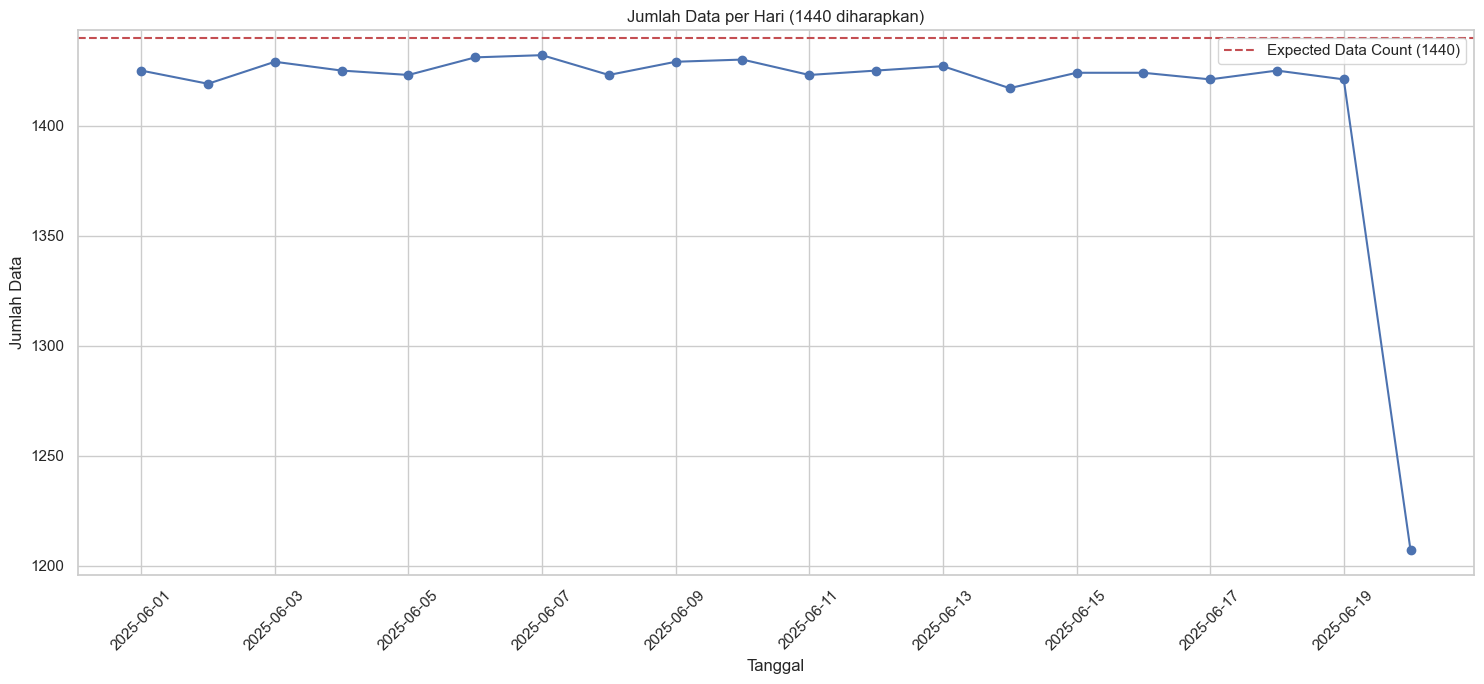

Hari dengan jumlah data yang kurang dari 1440:
          date  count
0   2025-06-01   1425
1   2025-06-02   1419
2   2025-06-03   1429
3   2025-06-04   1425
4   2025-06-05   1423
5   2025-06-06   1431
6   2025-06-07   1432
7   2025-06-08   1423
8   2025-06-09   1429
9   2025-06-10   1430
10  2025-06-11   1423
11  2025-06-12   1425
12  2025-06-13   1427
13  2025-06-14   1417
14  2025-06-15   1424
15  2025-06-16   1424
16  2025-06-17   1421
17  2025-06-18   1425
18  2025-06-19   1421
19  2025-06-20   1207


In [9]:
# Mengelompokkan data berdasarkan hari
cuaca1['date'] = cuaca1['timestamp'].dt.date
data_per_day = cuaca1.groupby('date').size().reset_index(name='count')

# Visualisasi jumlah data per hari
plt.figure(figsize=(15, 7))
plt.plot(data_per_day['date'], data_per_day['count'], marker='o', linestyle='-')
plt.axhline(y=1440, color='r', linestyle='--', label='Expected Data Count (1440)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Data')
plt.title('Jumlah Data per Hari (1440 diharapkan)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Menampilkan hari-hari yang tidak memenuhi 1440 data
days_with_missing_data = data_per_day[data_per_day['count'] != 1440]
print("Hari dengan jumlah data yang kurang dari 1440:")
print(days_with_missing_data)

In [10]:
cuaca1.dtypes

dew                                 float64
humidity                            float64
pressure                            float64
temperature                         float64
timestamp      datetime64[ns, Asia/Jakarta]
volt                                float64
date                                 object
dtype: object

In [11]:
cuaca2.dtypes

dew                                 float64
humidity                            float64
pressure                            float64
rainfall                            float64
rainrate                            float64
temperature                         float64
timestamp      datetime64[ns, Asia/Jakarta]
volt                                float64
dtype: object

In [12]:
cuaca1.head(10)

,dew,humidity,pressure,temperature,timestamp,volt,date
1748710856,25.35366,97.79,1013.13,25.73,2025-06-01 00:00:56+07:00,4.12,2025-06-01
1748710916,25.35194,97.78,1013.22,25.73,2025-06-01 00:01:56+07:00,4.11,2025-06-01
1748710976,25.28523,97.74,1013.11,25.67,2025-06-01 00:02:56+07:00,4.12,2025-06-01
1748711036,25.28832,97.70,1013.15,25.68,2025-06-01 00:03:56+07:00,4.12,2025-06-01
1748711096,25.25153,97.66,1013.16,25.65,2025-06-01 00:04:56+07:00,4.12,2025-06-01
1748711156,25.19480,97.62,1013.17,25.60,2025-06-01 00:05:56+07:00,4.12,2025-06-01
1748711216,25.17278,97.55,1013.26,25.59,2025-06-01 00:06:56+07:00,4.12,2025-06-01
1748711276,25.17930,97.53,1013.18,25.60,2025-06-01 00:07:56+07:00,4.12,2025-06-01
1748711336,25.13906,97.47,1013.21,25.57,2025-06-01 00:08:56+07:00,4.11,2025-06-01
1748711396,25.10190,97.37,1013.18,25.55,2025-06-01 00:09:56+07:00,4.12,2025-06-01


In [13]:
datacuaca = cuaca1
datacuaca2 = cuaca2

In [14]:
pyg.walk(datacuaca, hideDataSourceConfig=True, vegaTheme='vega' )
walker = pyg.walk(datacuaca)

Box(children=(HTML(value='\n<div id="ifr-pyg-00063800acc5b480kpszfcaO8LKXGi6g" style="height: auto">\n    <hea…

Box(children=(HTML(value='\n<div id="ifr-pyg-00063800acd13d33J9arx7BOZLbqIFVP" style="height: auto">\n    <hea…

Visualisasi missing values untuk datacuaca:


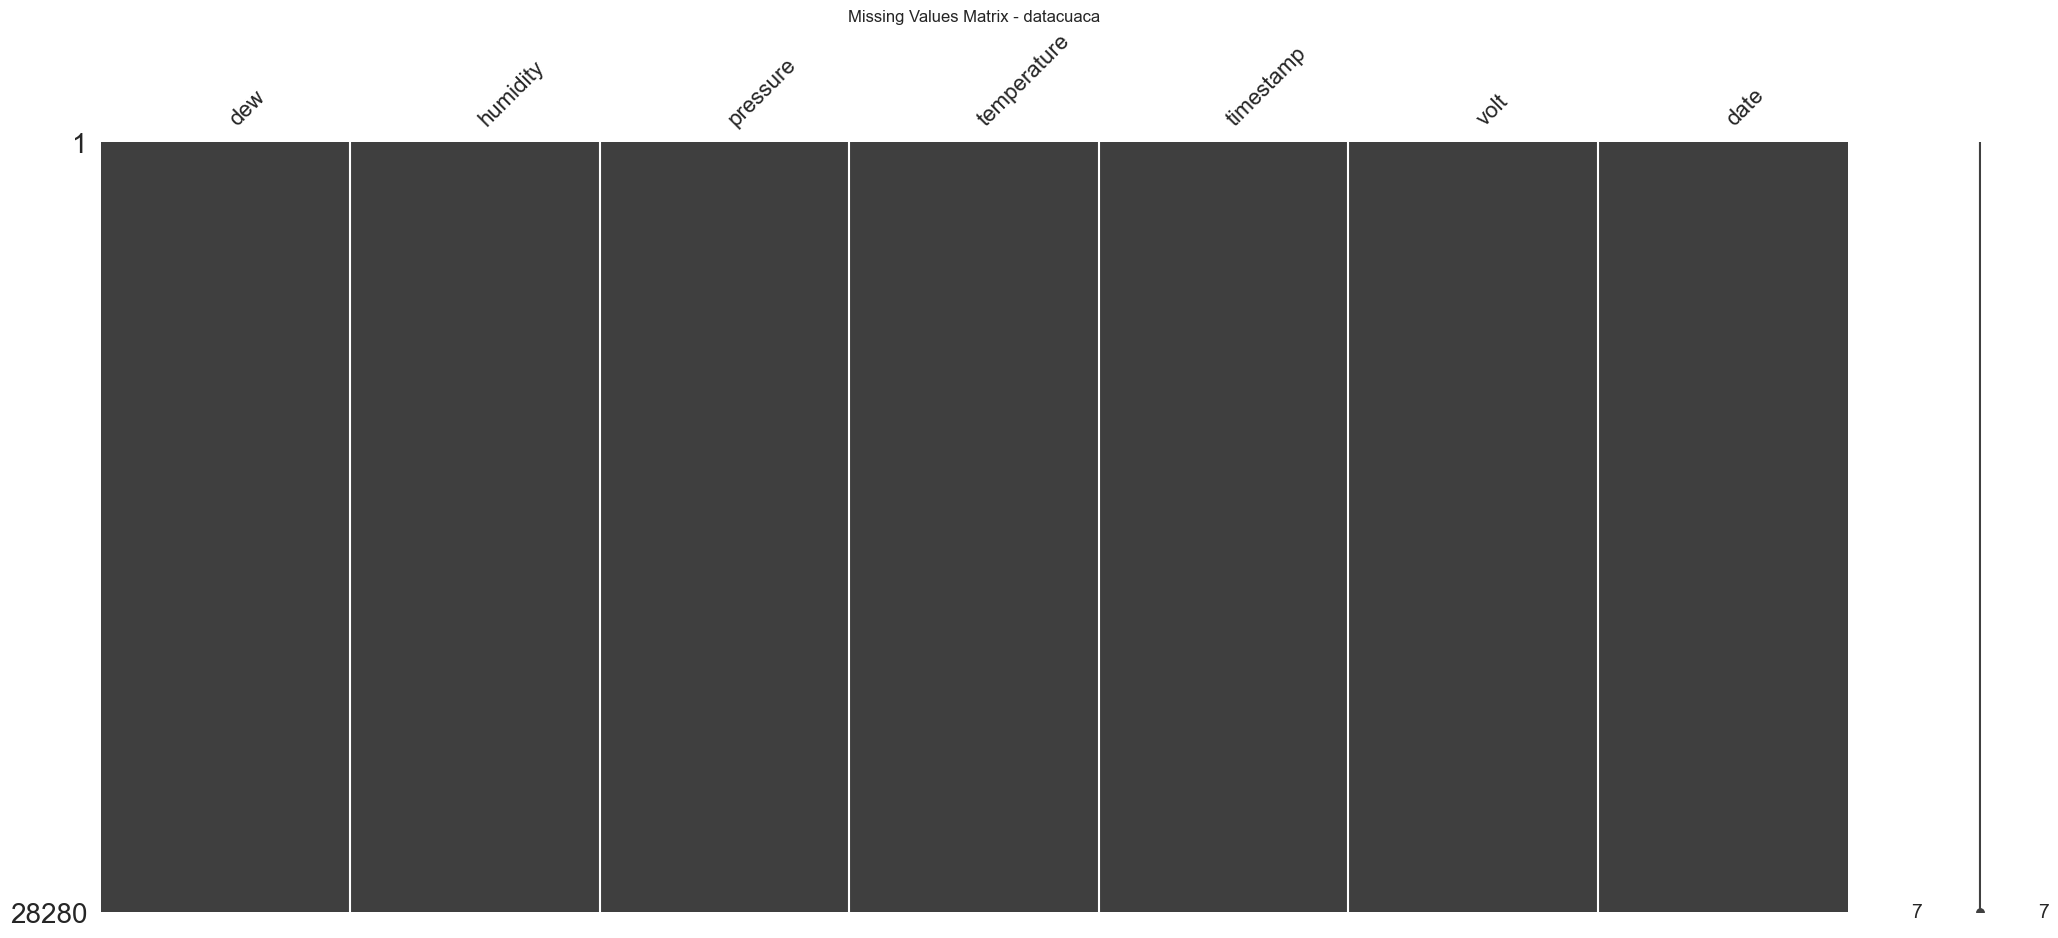

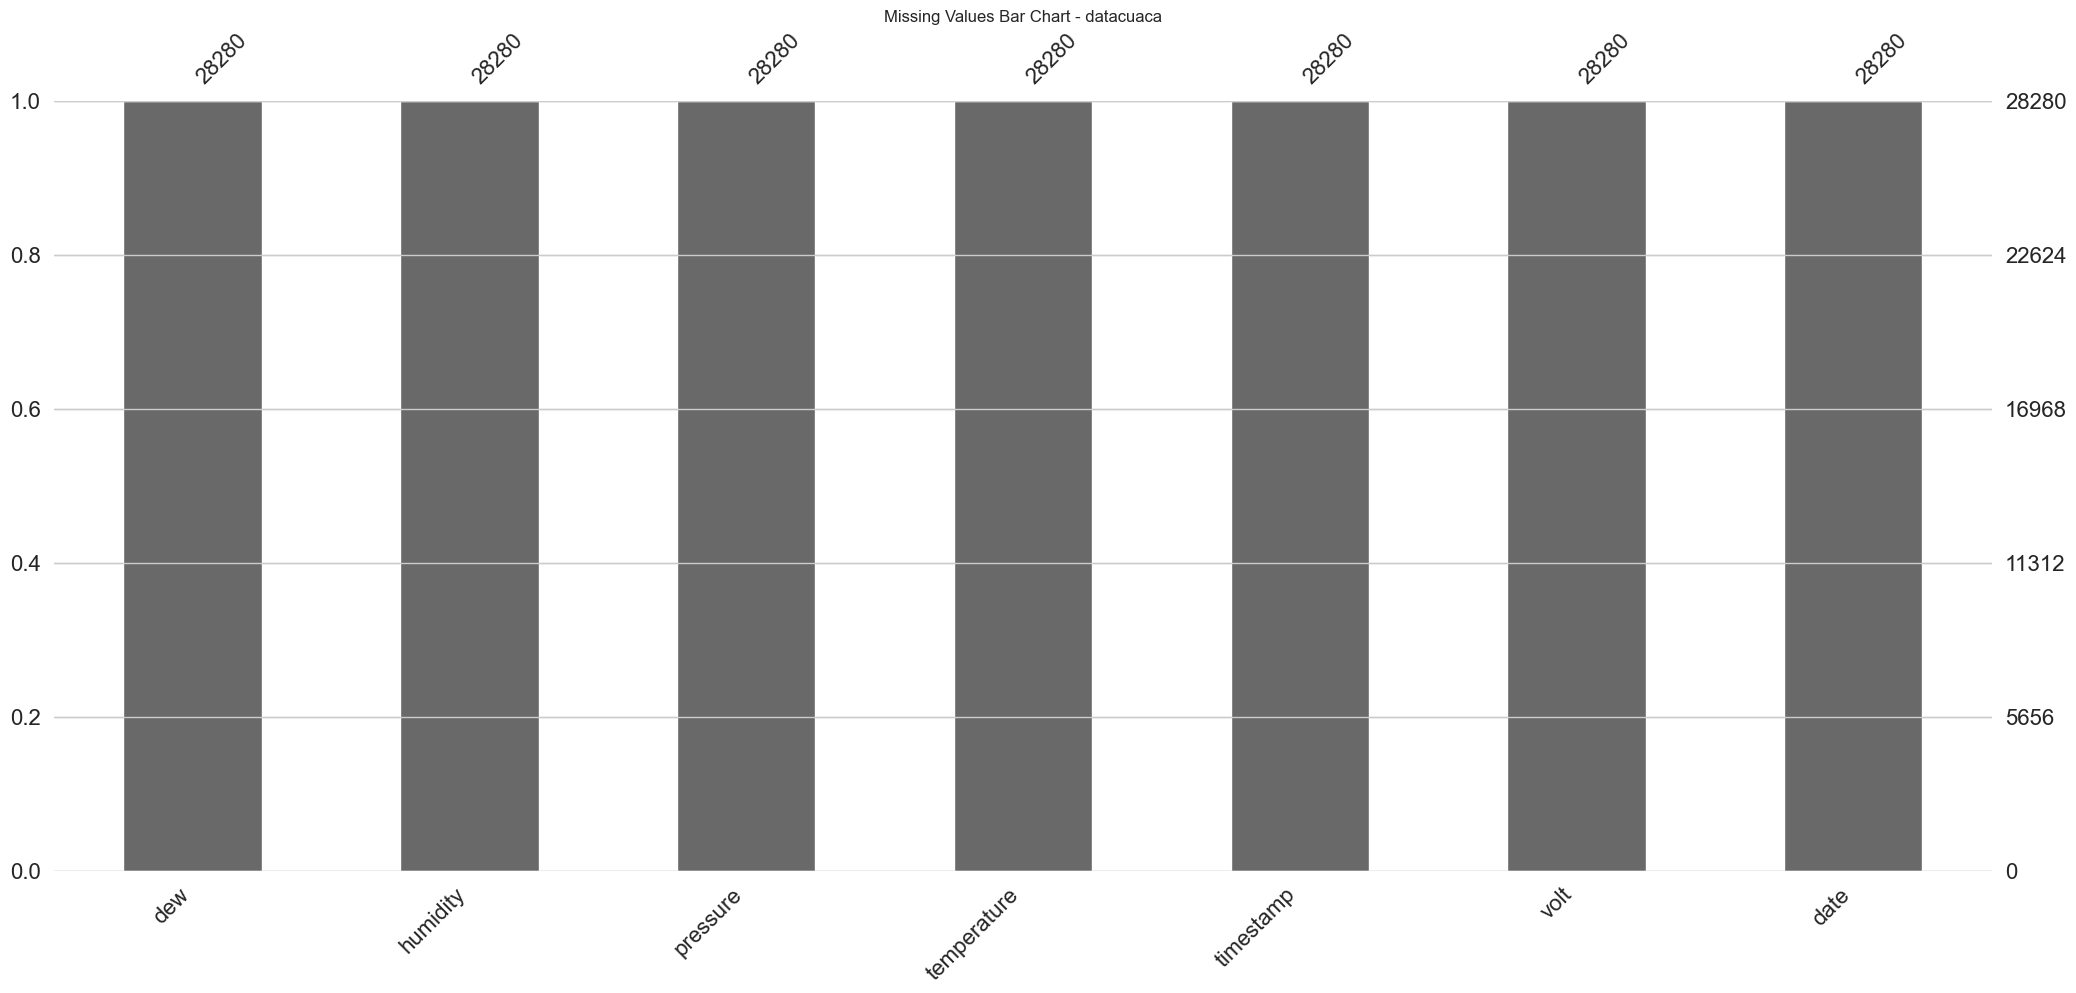

d:\conda_env\tensorflow\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
d:\conda_env\tensorflow\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


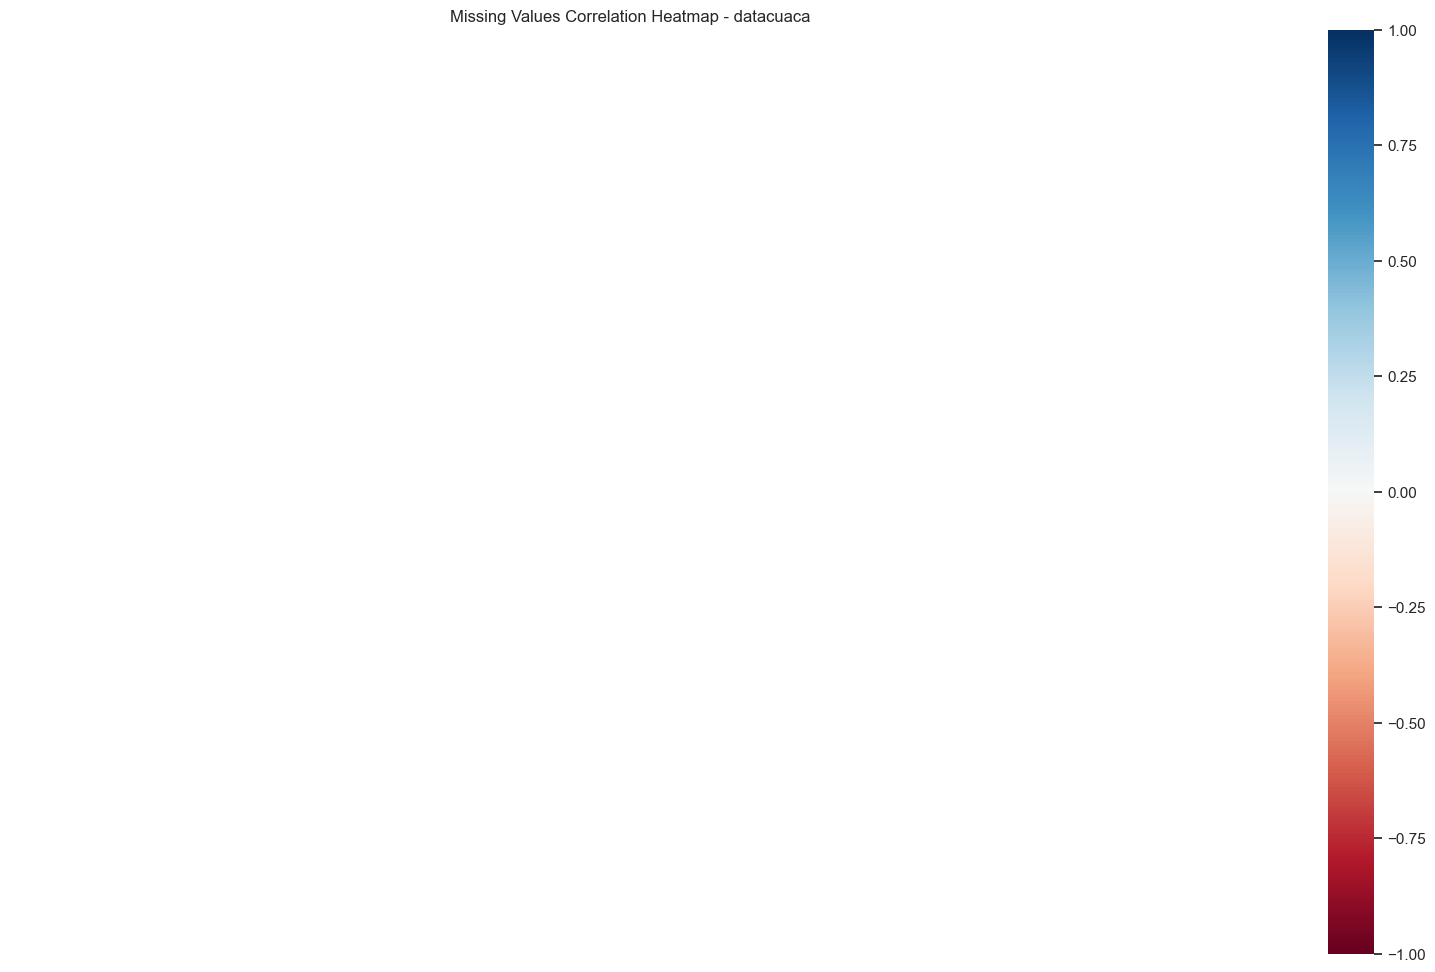

Visualisasi missing values untuk datacuaca2:


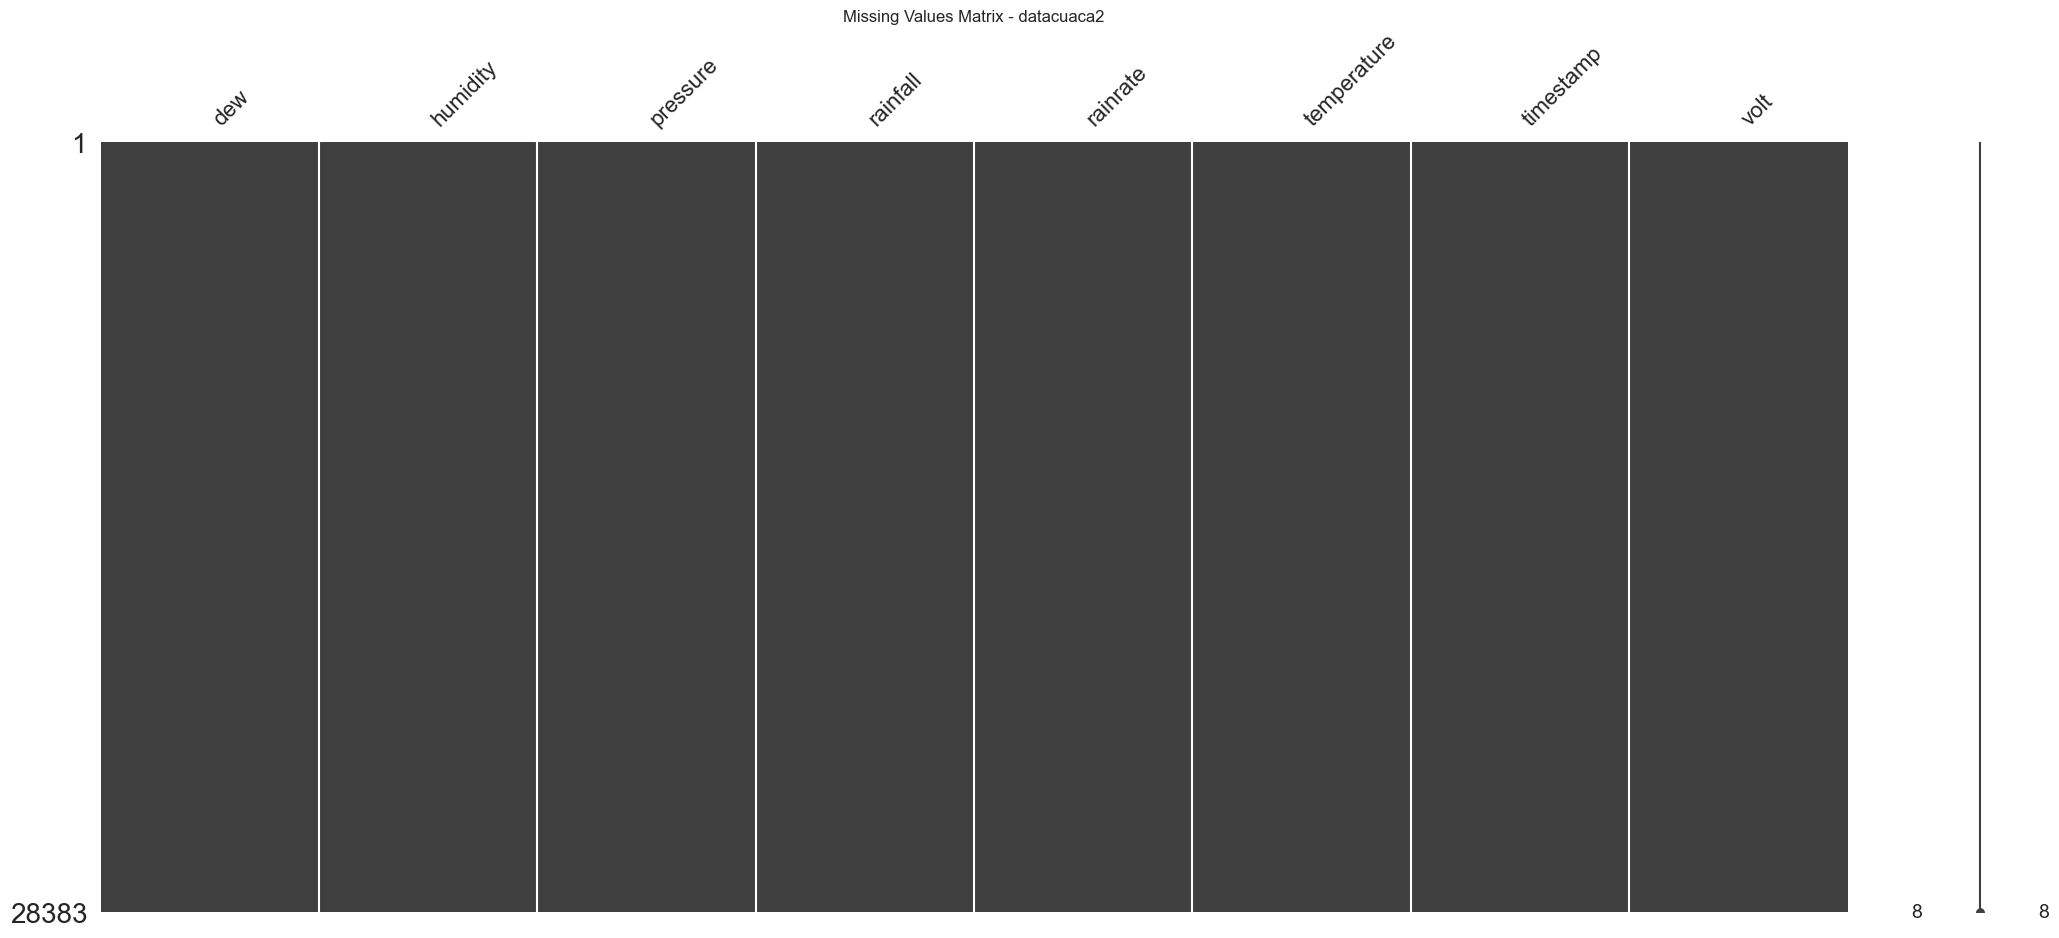

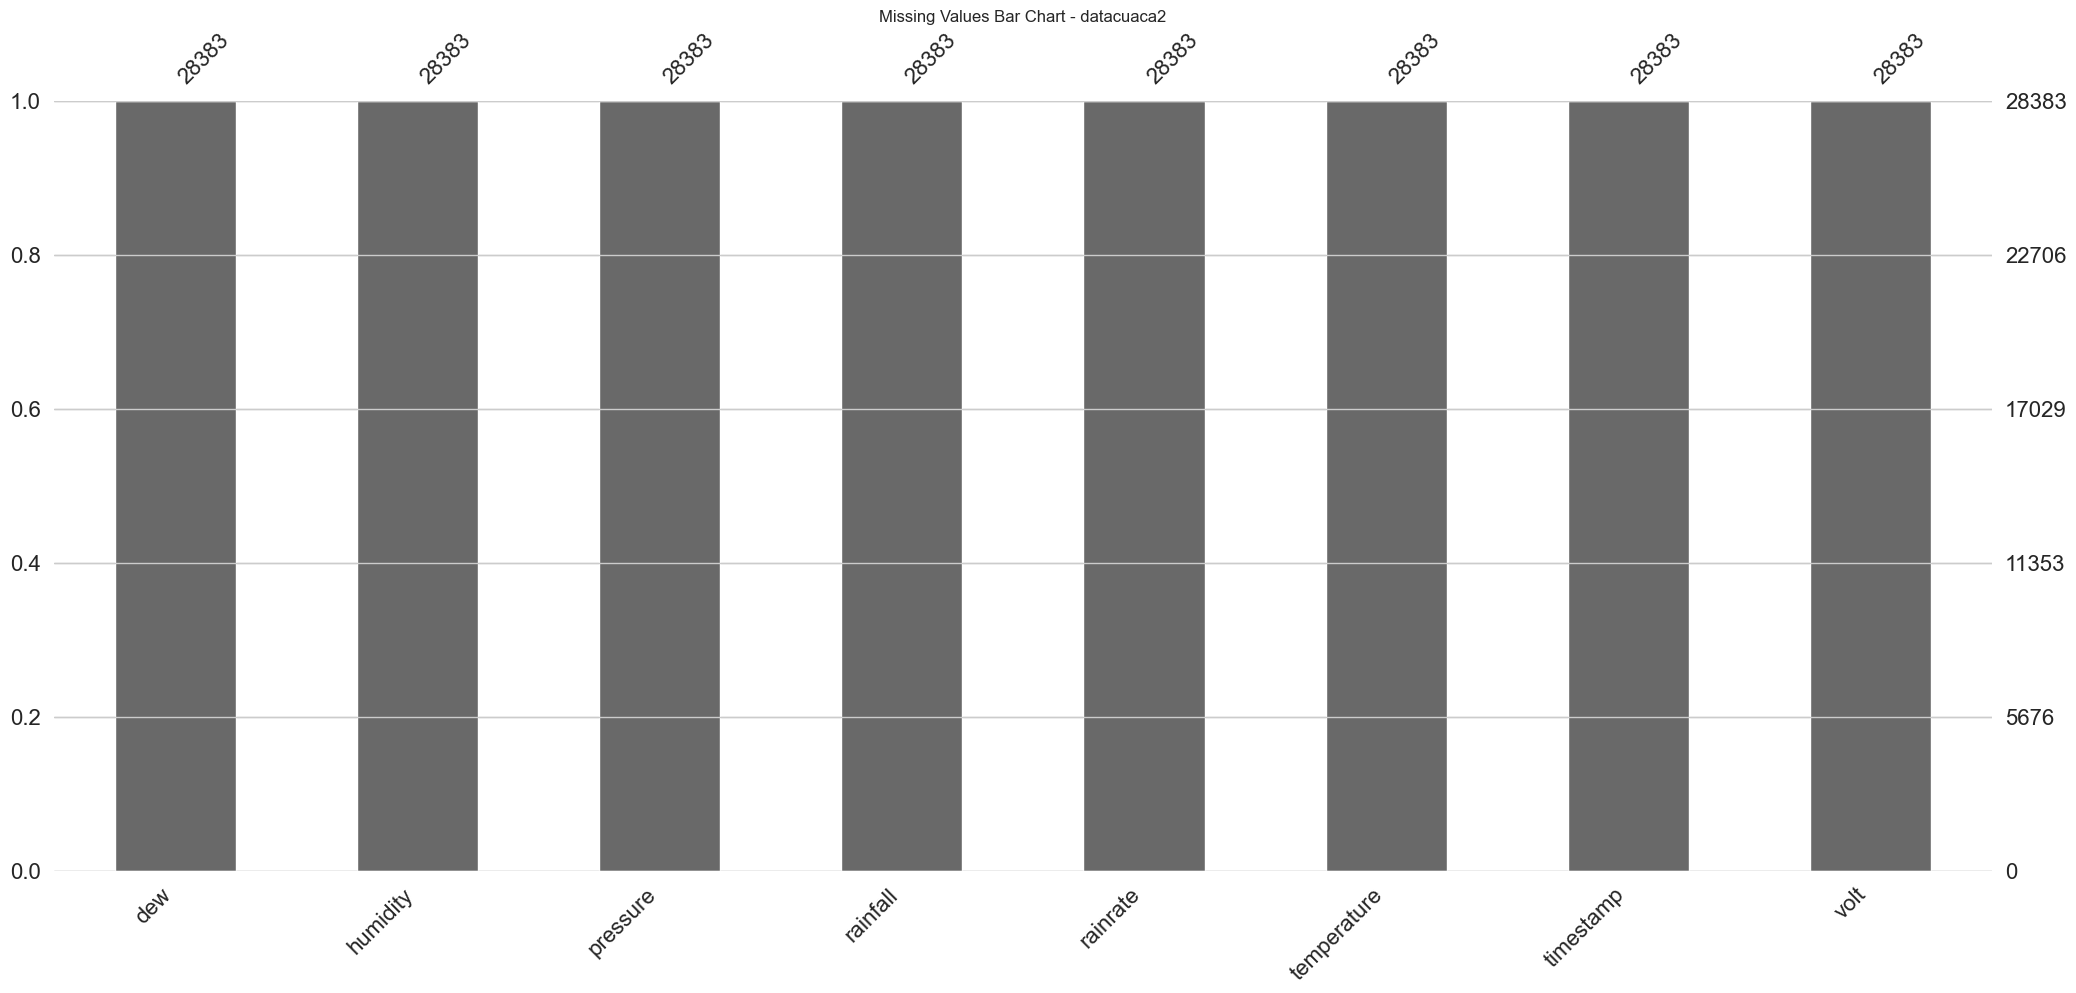

d:\conda_env\tensorflow\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
d:\conda_env\tensorflow\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


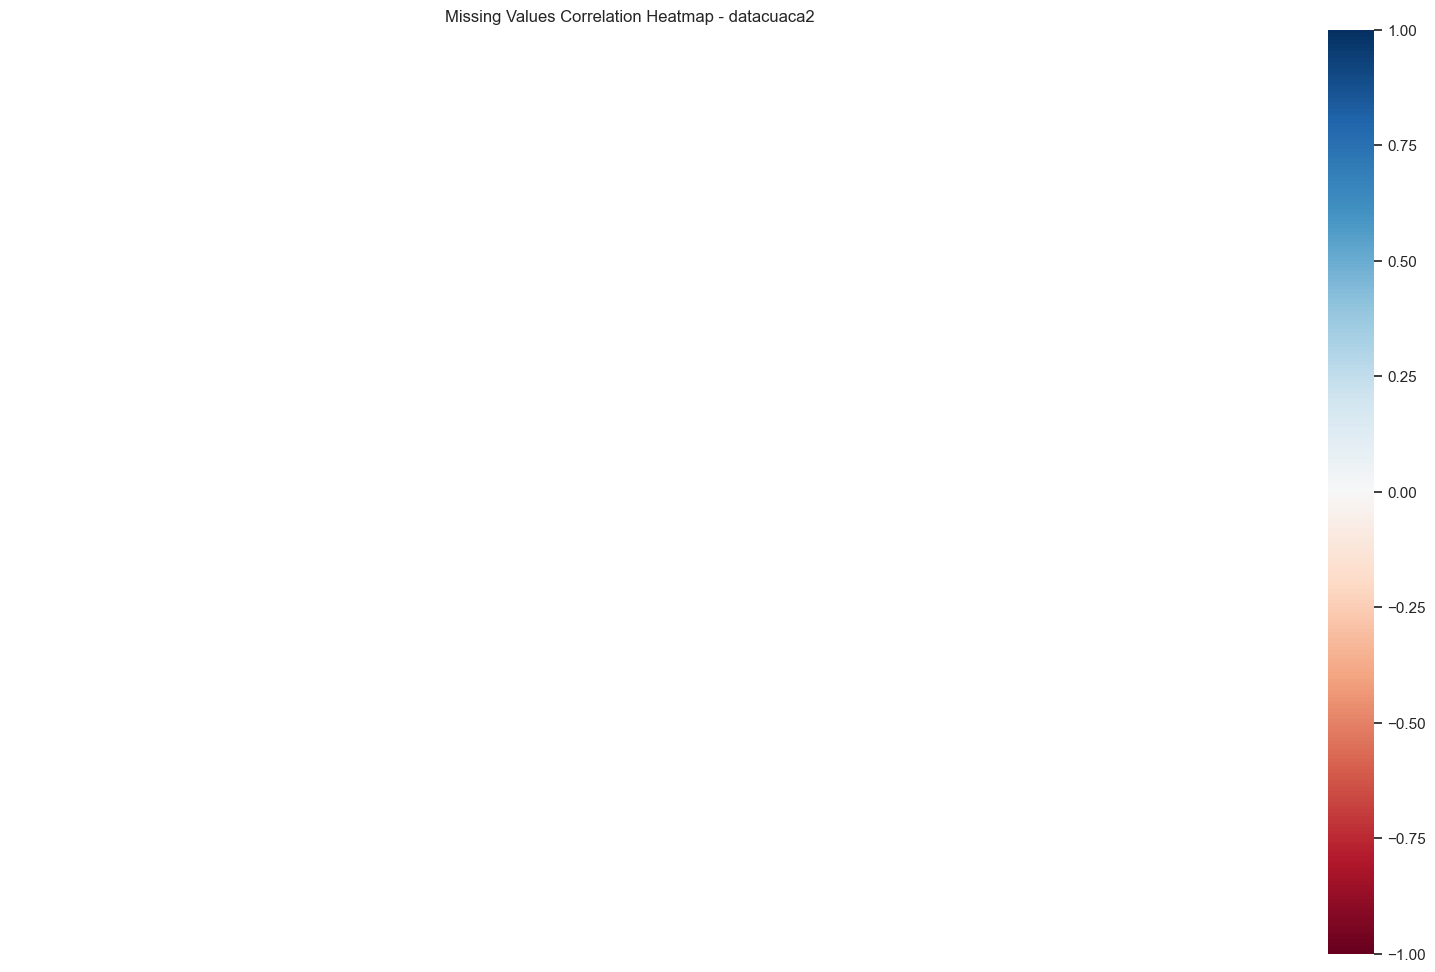

Ringkasan missing values untuk datacuaca:
dew            0
humidity       0
pressure       0
temperature    0
timestamp      0
volt           0
date           0
dtype: int64

Ringkasan missing values untuk datacuaca2:
dew            0
humidity       0
pressure       0
rainfall       0
rainrate       0
temperature    0
timestamp      0
volt           0
dtype: int64


In [15]:
# Visualisasi missing values untuk datacuaca
print("Visualisasi missing values untuk datacuaca:")
msno.matrix(datacuaca)
plt.title("Missing Values Matrix - datacuaca")
plt.show()

msno.bar(datacuaca)
plt.title("Missing Values Bar Chart - datacuaca")
plt.show()

msno.heatmap(datacuaca)
plt.title("Missing Values Correlation Heatmap - datacuaca")
plt.show()

# Visualisasi missing values untuk datacuaca2
print("Visualisasi missing values untuk datacuaca2:")
msno.matrix(datacuaca2)
plt.title("Missing Values Matrix - datacuaca2")
plt.show()

msno.bar(datacuaca2)
plt.title("Missing Values Bar Chart - datacuaca2")
plt.show()

msno.heatmap(datacuaca2)
plt.title("Missing Values Correlation Heatmap - datacuaca2")
plt.show()

# Menampilkan ringkasan missing values
print("Ringkasan missing values untuk datacuaca:")
print(datacuaca.isnull().sum())

print("\nRingkasan missing values untuk datacuaca2:")
print(datacuaca2.isnull().sum())

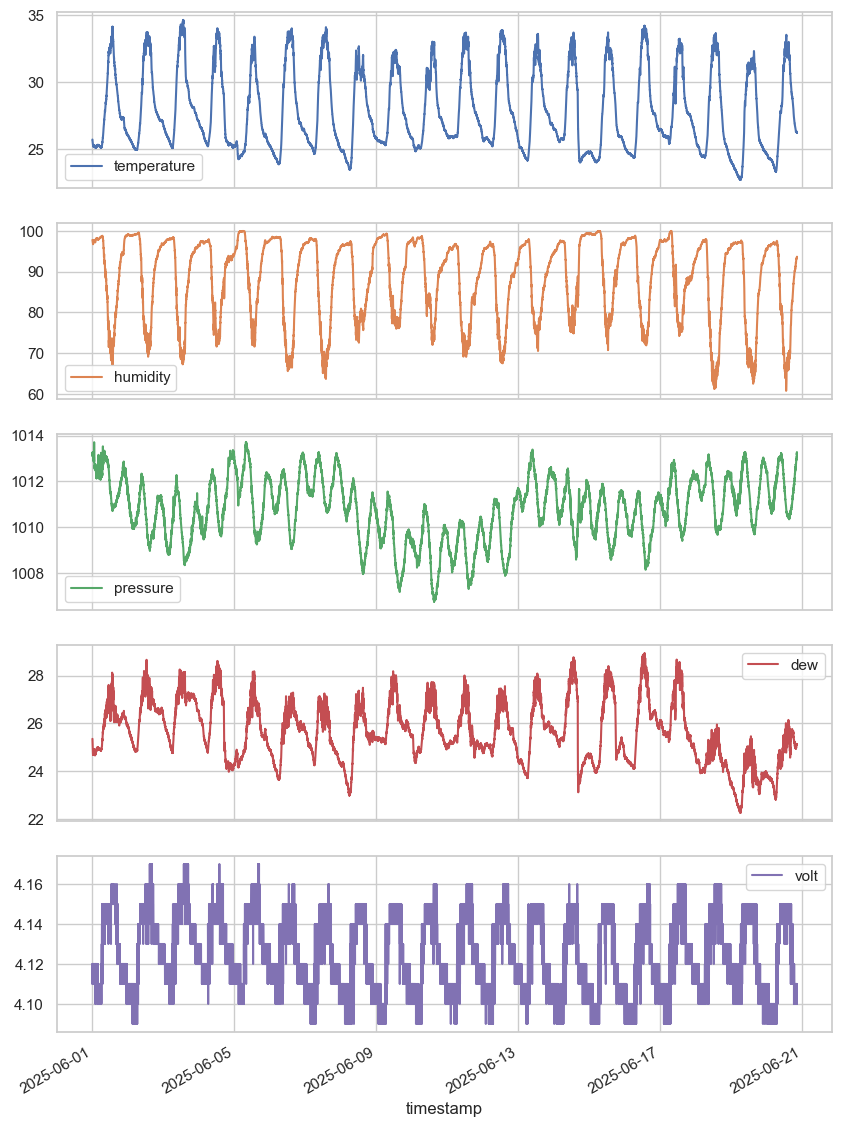

In [16]:
datacuaca.plot(
    y=[
    'temperature', 
    'humidity', 
    'pressure', 
    'dew',
    #'rainrate',
    #'rainfall',
    'volt'
    ],
    x='timestamp',
    subplots=True, figsize=(10, 15))
plt.show()

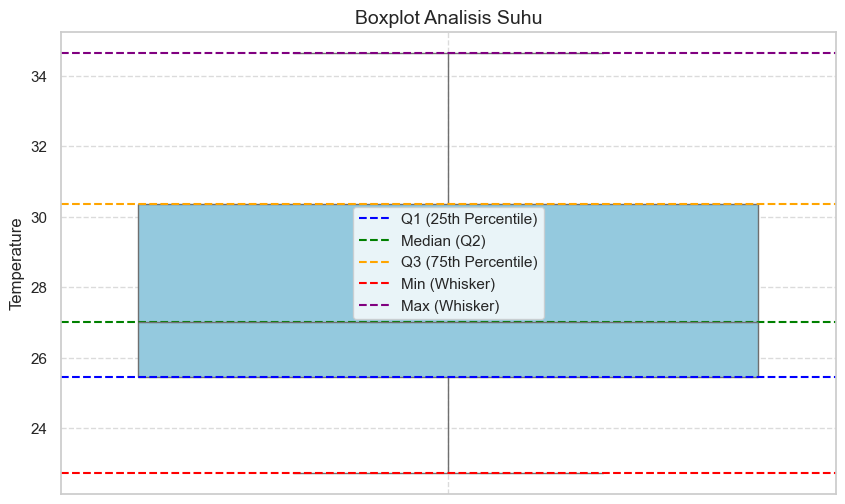

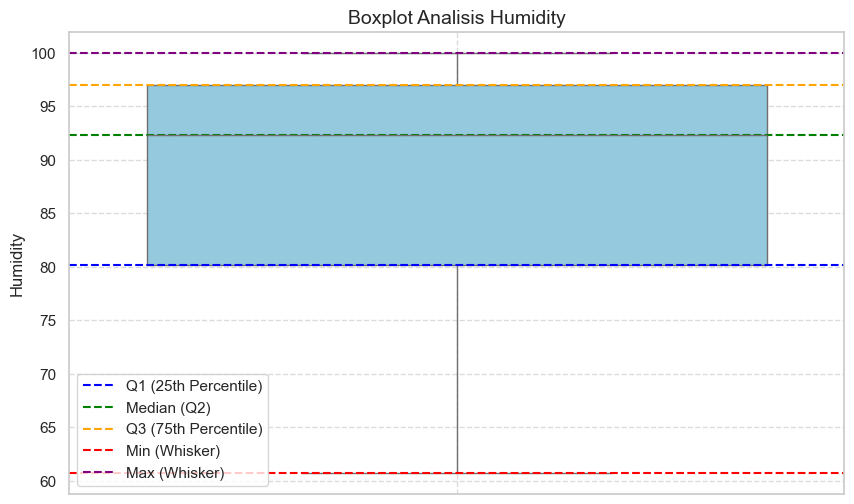

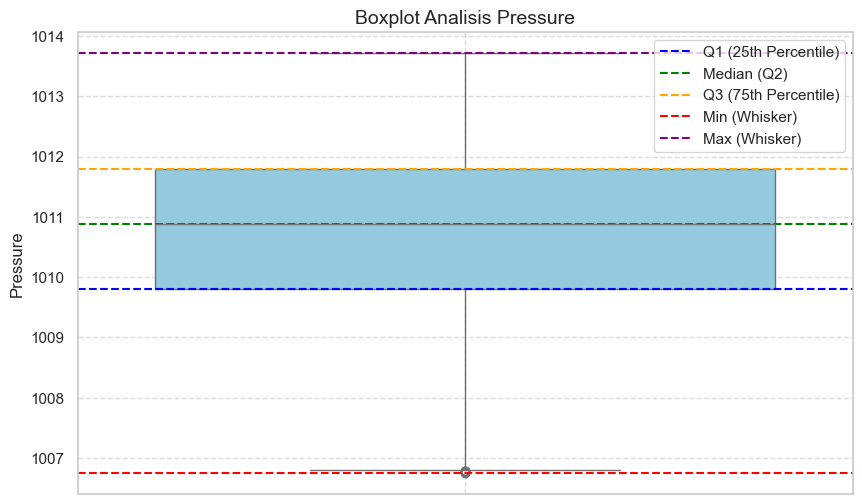

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk membuat boxplot analisis
def create_boxplot(data, column, title):
    if column in data.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(y=data[column], color='skyblue')
        
        # Menambahkan garis untuk Q1, Median (Q2), Q3, dan whiskers
        q1 = data[column].quantile(0.25)
        median = data[column].median()
        q3 = data[column].quantile(0.75)
        min_val = data[column].min()
        max_val = data[column].max()
        
        plt.axhline(q1, color='blue', linestyle='--', label='Q1 (25th Percentile)')
        plt.axhline(median, color='green', linestyle='--', label='Median (Q2)')
        plt.axhline(q3, color='orange', linestyle='--', label='Q3 (75th Percentile)')
        plt.axhline(min_val, color='red', linestyle='--', label='Min (Whisker)')
        plt.axhline(max_val, color='purple', linestyle='--', label='Max (Whisker)')
        
        # Menambahkan label dan judul
        plt.title(title, fontsize=14)
        plt.ylabel(column.capitalize(), fontsize=12)
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()
    else:
        print(f"Kolom '{column}' tidak ditemukan dalam DataFrame.")
# Membuat boxplot untuk temperature
create_boxplot(datacuaca, 'temperature', 'Boxplot Analisis Suhu')

# Membuat boxplot untuk humidity
create_boxplot(datacuaca, 'humidity', 'Boxplot Analisis Humidity')

# Membuat boxplot untuk pressure
create_boxplot(datacuaca, 'pressure', 'Boxplot Analisis Pressure')

In [18]:
# Mengubah kolom 'timestamp' menjadi datetime
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Mengurutkan data berdasarkan 'timestamp'
datacuaca = datacuaca.sort_values(by='timestamp')

# Menambahkan kolom 'hour', 'minute', 'day', 'month', dan 'year' dari 'timestamp'
datacuaca['hour'] = datacuaca['timestamp'].dt.hour
datacuaca['minute'] = datacuaca['timestamp'].dt.minute
datacuaca['day'] = datacuaca['timestamp'].dt.day
datacuaca['week'] = datacuaca['timestamp'].dt.isocalendar().week
datacuaca['month'] = datacuaca['timestamp'].dt.month
datacuaca['year'] = datacuaca['timestamp'].dt.year

In [19]:
# Mengubah kolom 'timestamp' menjadi datetime
datacuaca2['timestamp'] = pd.to_datetime(datacuaca2['timestamp'])

# Mengurutkan data berdasarkan 'timestamp'
datacuaca2 = datacuaca2.sort_values(by='timestamp')

# Menambahkan kolom 'hour', 'minute', 'day', 'month', dan 'year' dari 'timestamp'
datacuaca2['hour'] = datacuaca2['timestamp'].dt.hour
datacuaca2['minute'] = datacuaca2['timestamp'].dt.minute
datacuaca2['day'] = datacuaca2['timestamp'].dt.day
datacuaca2['week'] = datacuaca2['timestamp'].dt.isocalendar().week
datacuaca2['month'] = datacuaca2['timestamp'].dt.month
datacuaca2['year'] = datacuaca2['timestamp'].dt.year

In [23]:
pilih_tahun = 2025
pilih_bulan = 6

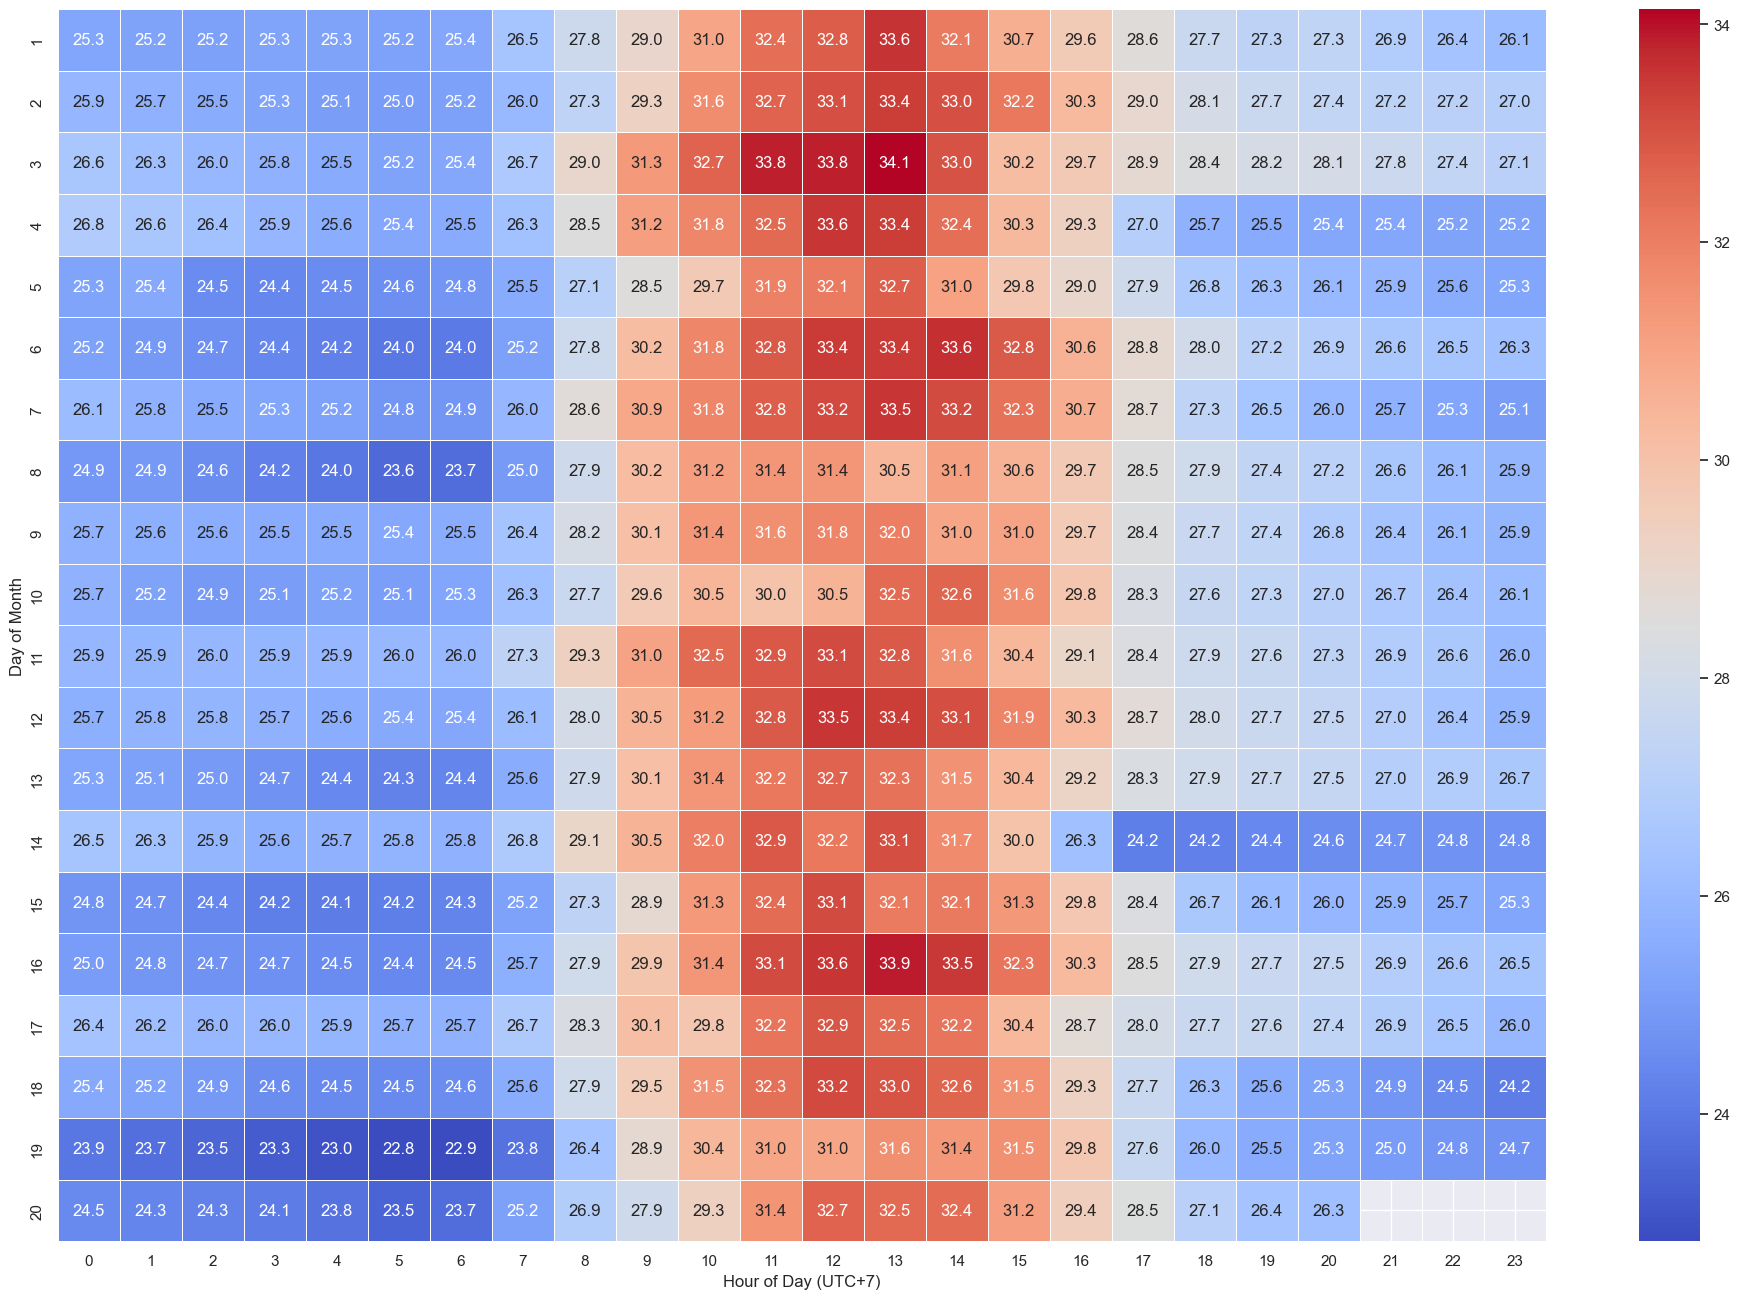

In [24]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp']
.dt.year == pilih_tahun) & (datacuaca['timestamp']
.dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'temperature': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
temperature_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='temperature')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(temperature_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="coolwarm")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap
plt.savefig("Temp_month" + "_" + str(pilih_tahun) + "_" + str(pilih_bulan) + ".jpg")
plt.show()



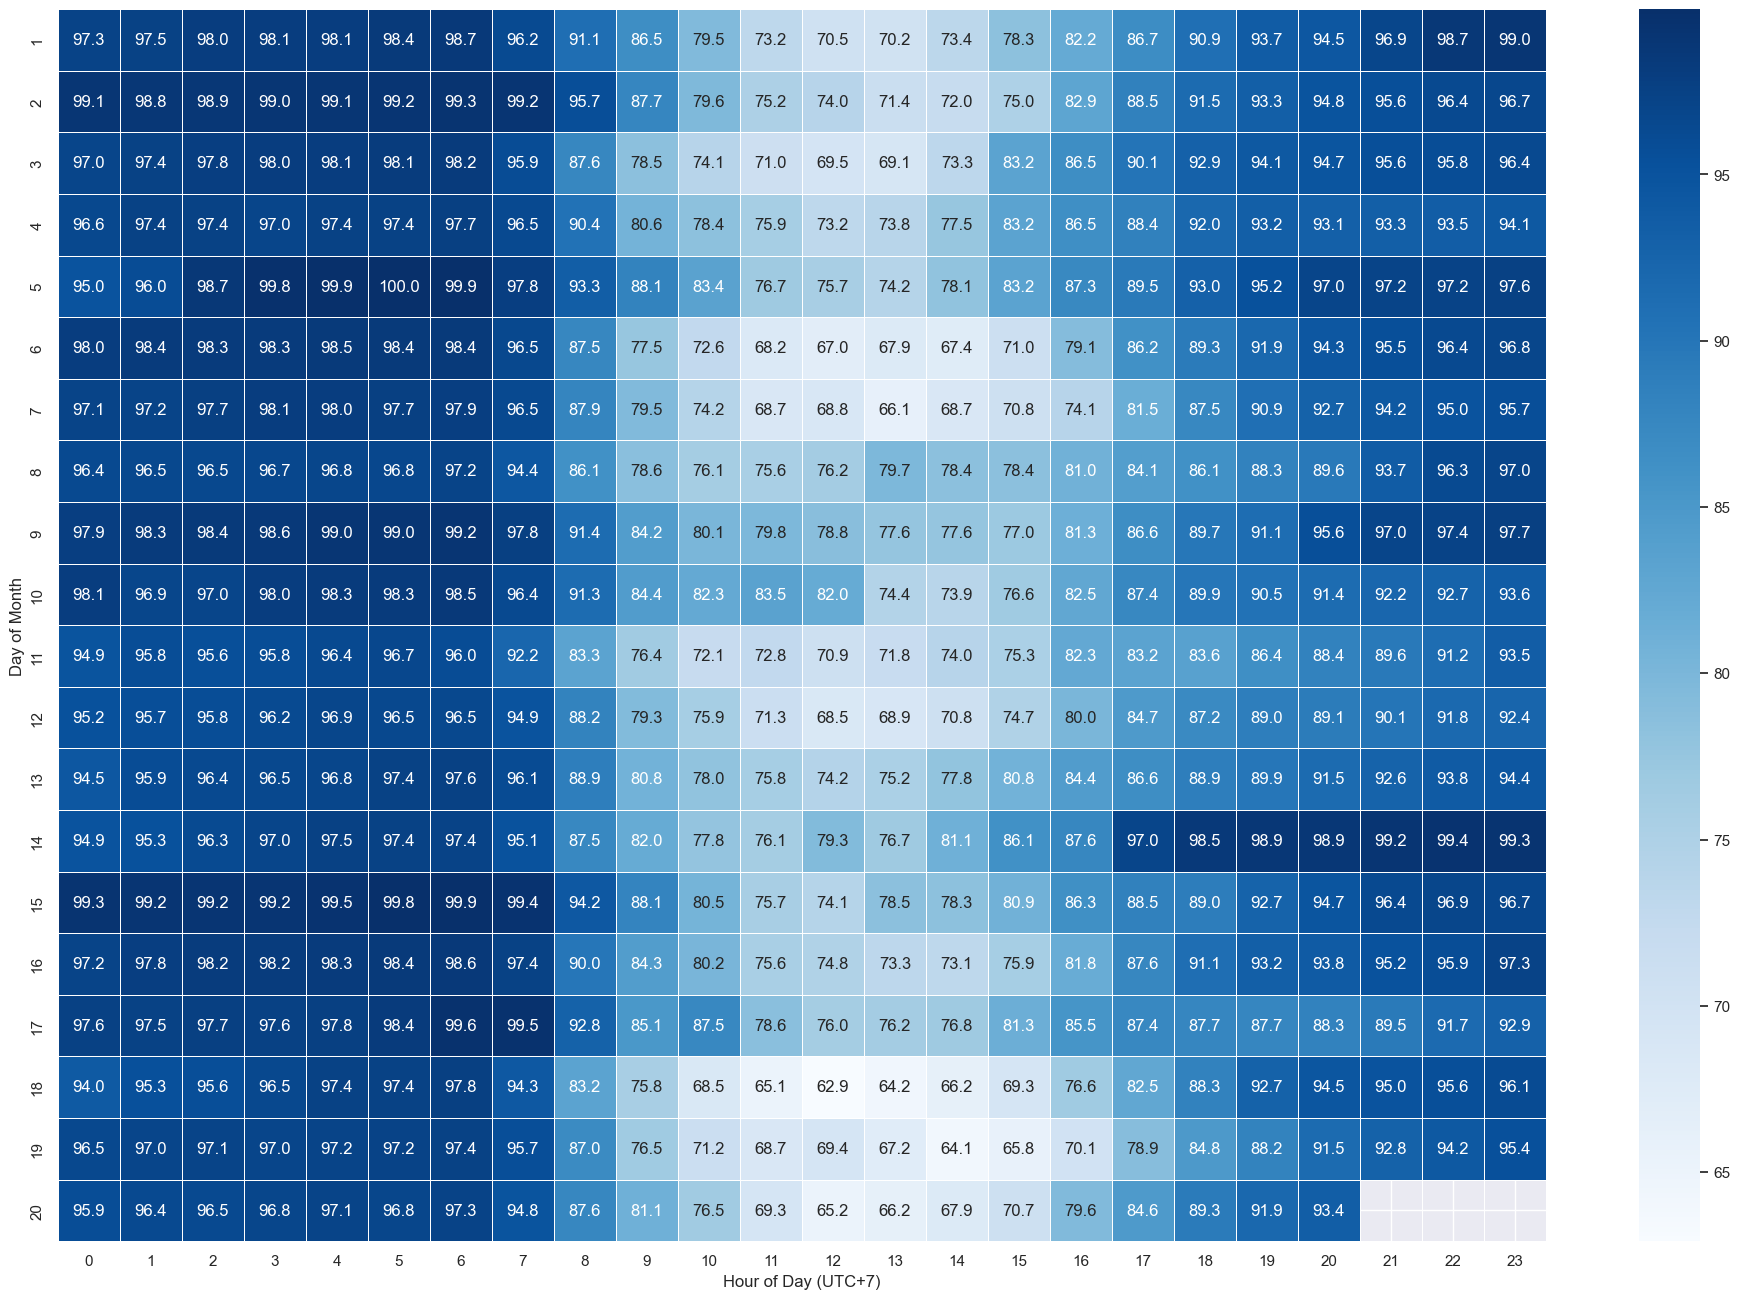

In [25]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'humidity': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
humidity_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='humidity')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(humidity_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="Blues")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap
plt.show()

Text(267.25, 0.5, 'Day of Month')

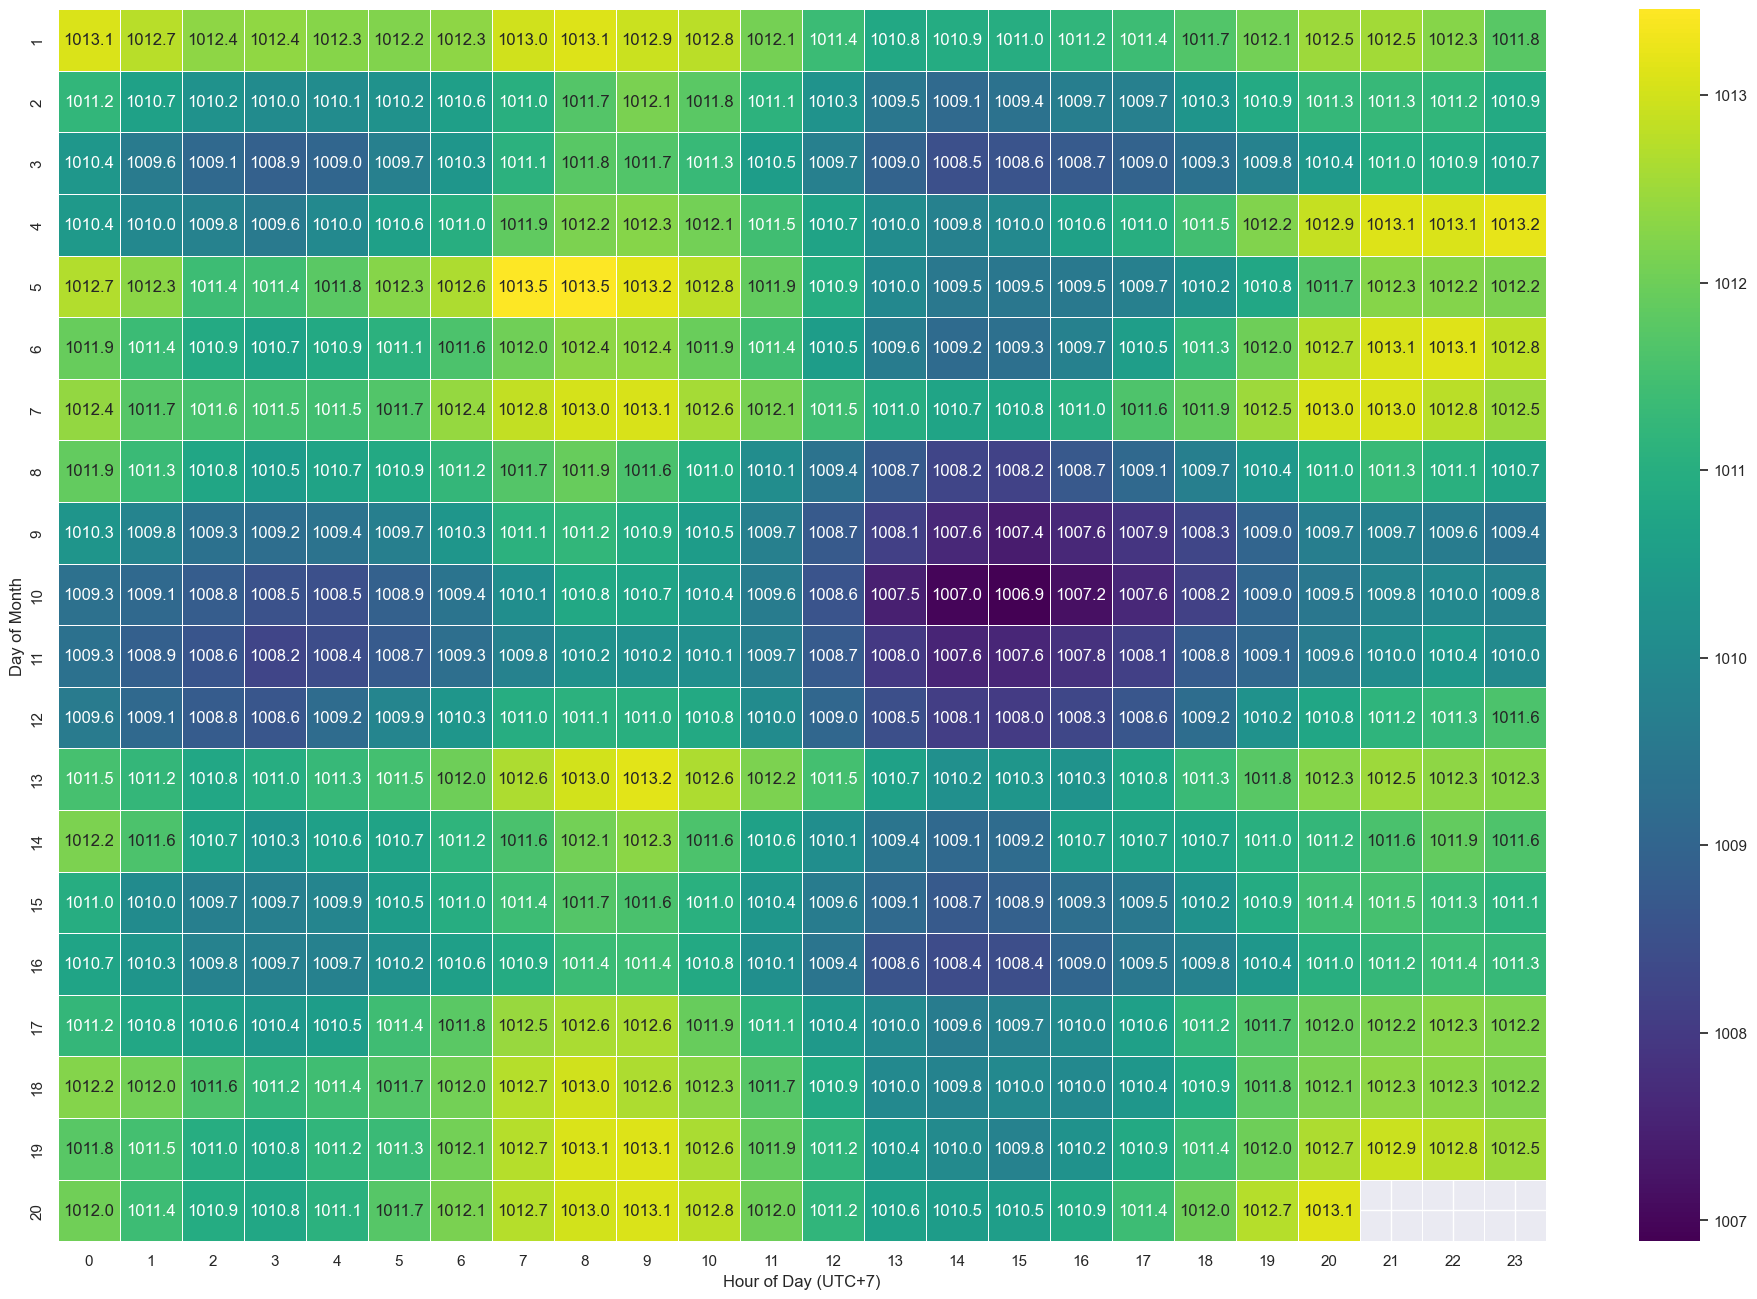

In [26]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Menambahkan kolom 'day' dan 'hour' dari 'timestamp'
datacuaca_month['day'] = datacuaca_month['timestamp'].dt.day
datacuaca_month['hour'] = datacuaca_month['timestamp'].dt.hour

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'pressure': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
pressure_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='pressure')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(pressure_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="viridis")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap

Text(267.25, 0.5, 'Day of Month')

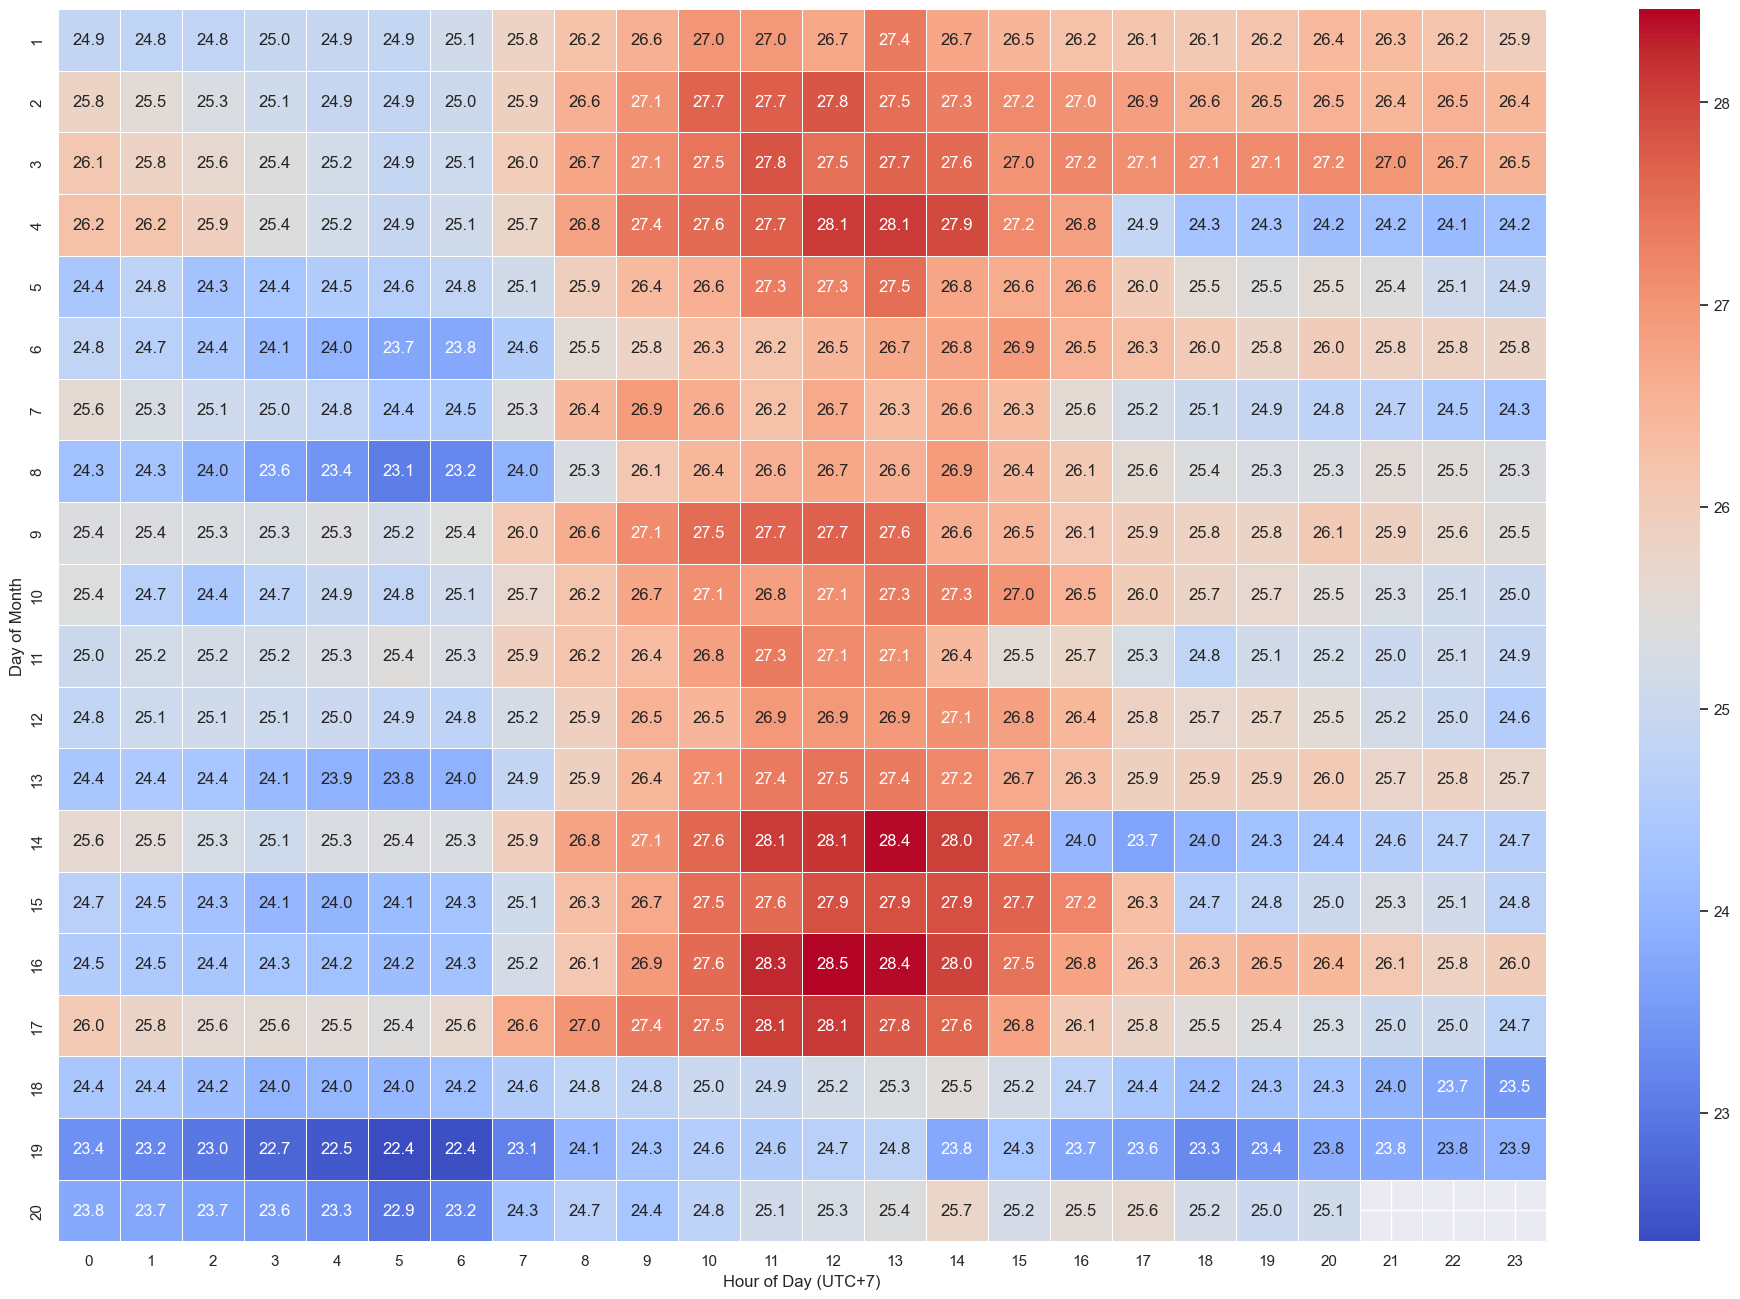

In [27]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'dew': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
dew_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='dew')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(dew_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="coolwarm")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap

In [28]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['month', 'day']).agg({'rainfall': 'max'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
rainfall_pivot = datacuaca_grouped.pivot(index='month', columns='day', values='rainfall')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(rainfall_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="Blues")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap

KeyError: "Column(s) ['rainfall'] do not exist"

Text(267.25, 0.5, 'Day of Month')

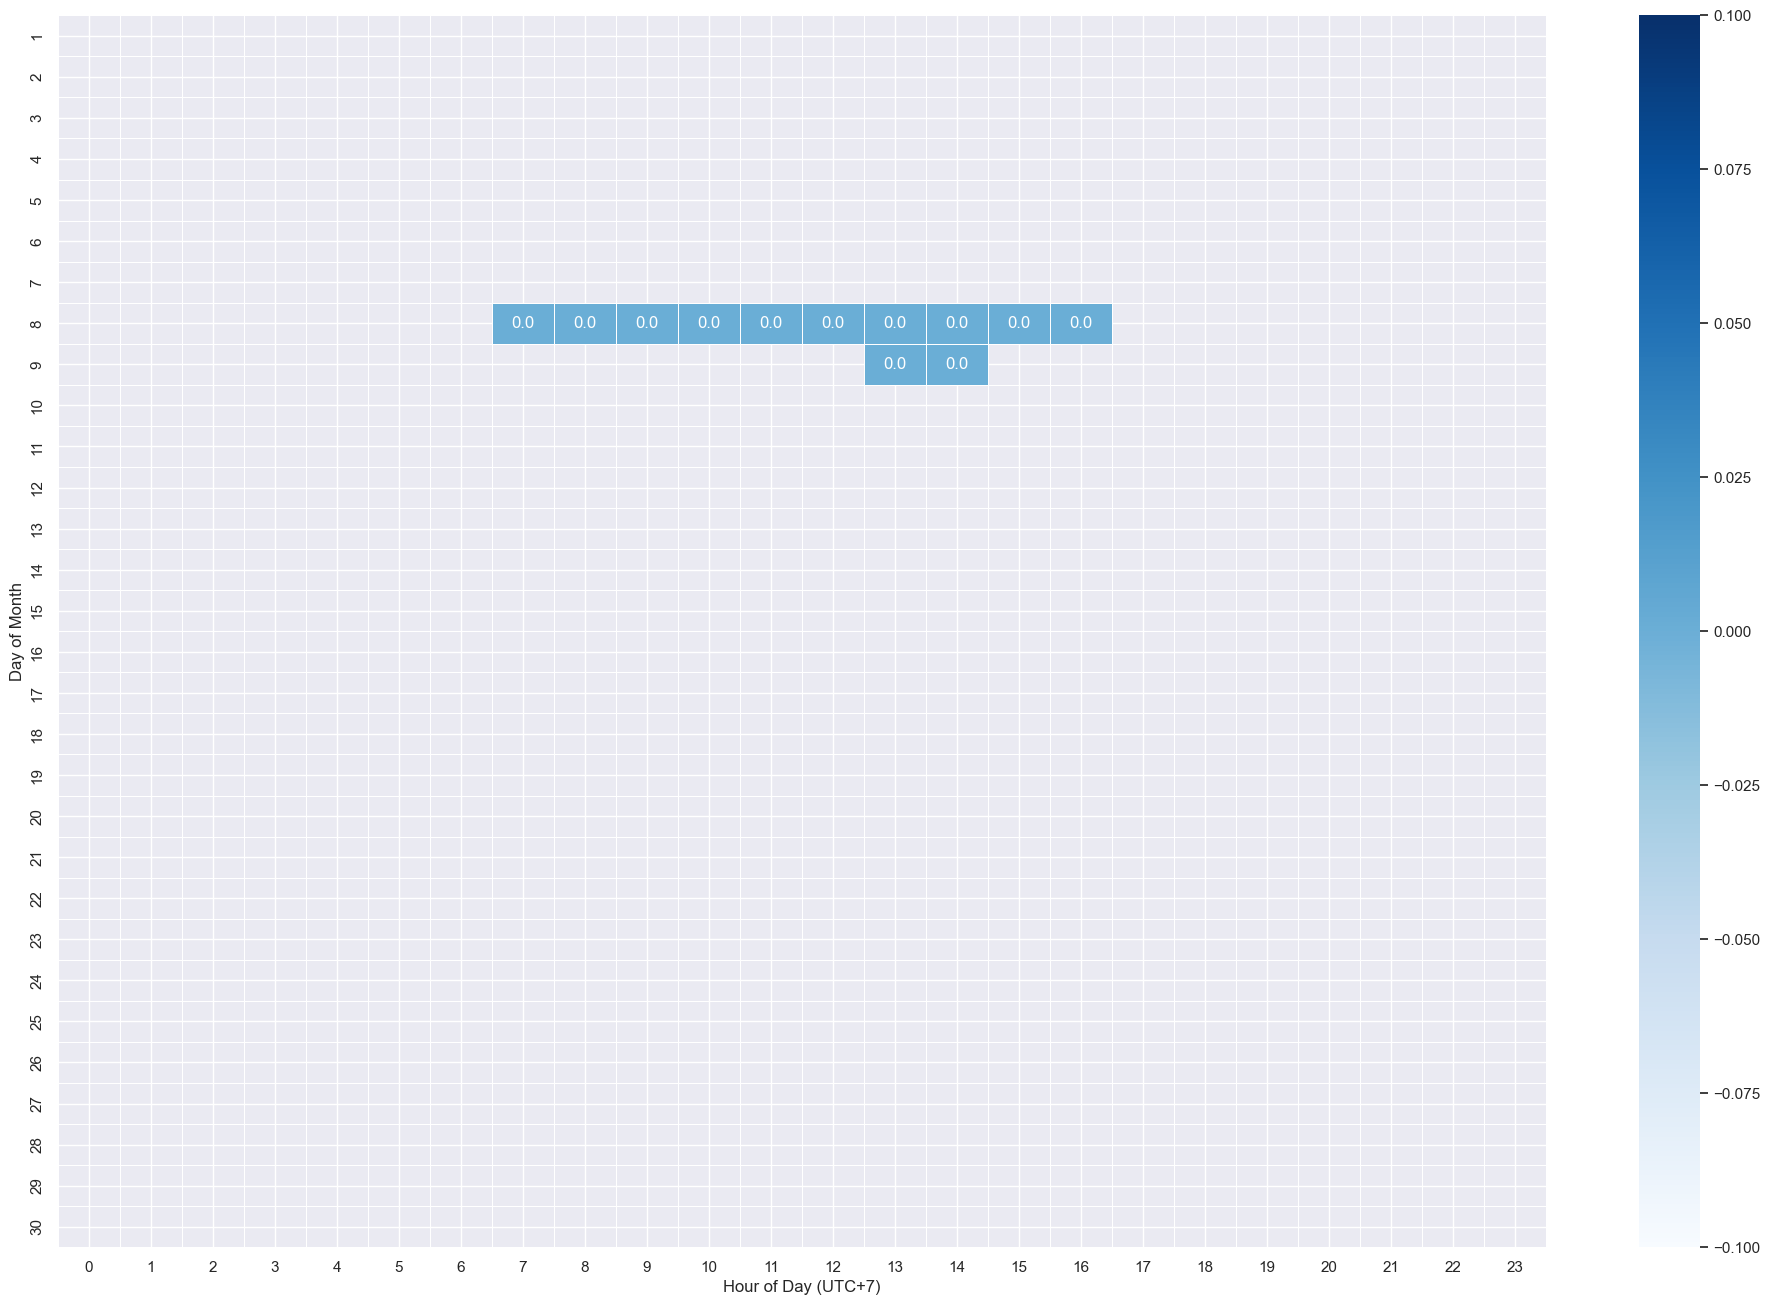

In [ ]:
# Mengonversi kolom 'timestamp' menjadi datetime jika belum
datacuaca['timestamp'] = pd.to_datetime(datacuaca['timestamp'])

# Filter data untuk bulan Tertentu
datacuaca_month = datacuaca[(datacuaca['timestamp'].dt.year == pilih_tahun) & (datacuaca['timestamp'].dt.month == pilih_bulan)]

# Mengurutkan data berdasarkan 'timestamp'
datacuaca_month = datacuaca_month.sort_values(by='timestamp')

# Mengelompokkan data berdasarkan 'day' dan 'hour', dan menghitung rata-rata suhu
datacuaca_grouped = datacuaca_month.groupby(['day', 'hour']).agg({'rainrate': 'mean'}).reset_index()

# Pivot dataframe untuk membuat format yang sesuai dengan heatmap
rainrate_pivot = datacuaca_grouped.pivot(index='day', columns='hour', values='rainrate')

# Visualisasi heatmap menggunakan seaborn
sns.set_theme()

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(rainrate_pivot, annot=True, fmt=".1f", linewidths=.5, ax=ax, cmap="Blues")

# Memberi label pada sumbu
ax.set_xlabel('Hour of Day (UTC+7)')
ax.set_ylabel('Day of Month')

# Menampilkan heatmap

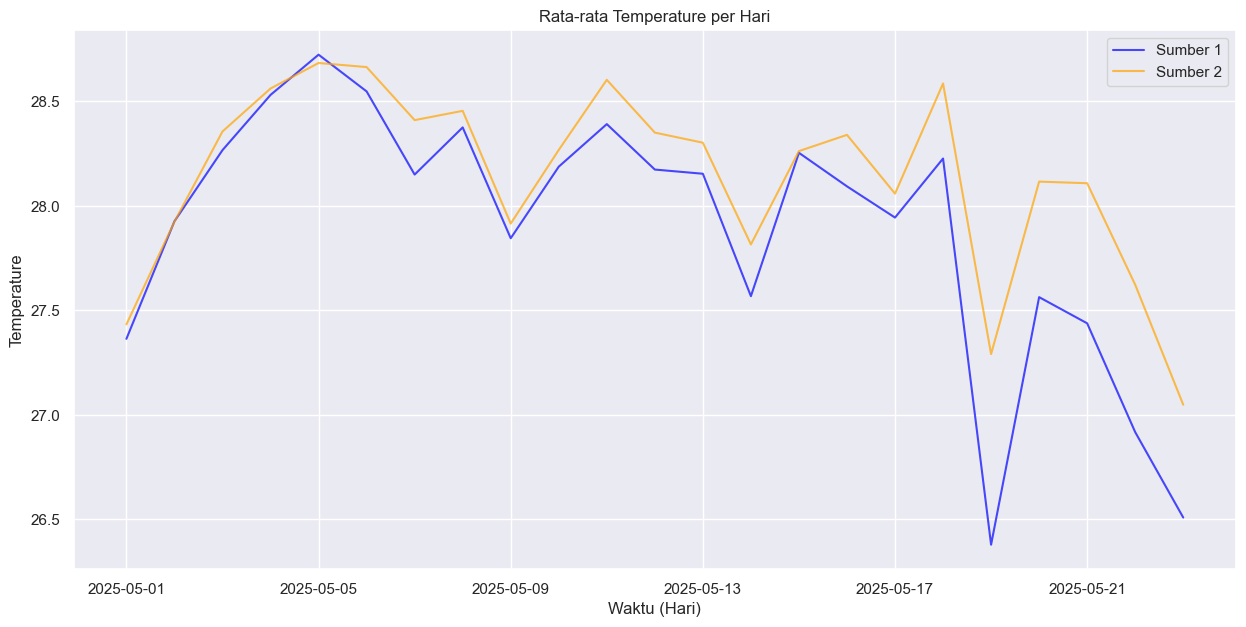

In [ ]:
import matplotlib.pyplot as plt

# Variabel pengganti untuk menentukan kolom yang akan digunakan
column_to_plot = 'temperature'  # Ubah ke 'humidity' atau 'pressure' sesuai kebutuhan

# Mengelompokkan data berdasarkan hari dan menghitung rata-rata untuk kolom yang dipilih
datacuaca['day'] = datacuaca['timestamp'].dt.floor('d')  # Membulatkan ke hari terdekat
datacuaca2['day'] = datacuaca2['timestamp'].dt.floor('d')

# Menghitung rata-rata per hari untuk kolom yang dipilih
datacuaca_daily = datacuaca.groupby('day')[column_to_plot].mean().reset_index()
datacuaca2_daily = datacuaca2.groupby('day')[column_to_plot].mean().reset_index()

# Plot data dari kedua DataFrame
plt.figure(figsize=(15, 7))

# Plot data dari datacuaca
plt.plot(datacuaca_daily['day'], datacuaca_daily[column_to_plot], label='Sumber 1', color='blue', alpha=0.7)

# Plot data dari datacuaca2
plt.plot(datacuaca2_daily['day'], datacuaca2_daily[column_to_plot], label='Sumber 2', color='orange', alpha=0.7)

# Menambahkan label, judul, dan legenda
plt.xlabel('Waktu (Hari)')
plt.ylabel(f'{column_to_plot.capitalize()}')
plt.title(f'Rata-rata {column_to_plot.capitalize()} per Hari')
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()

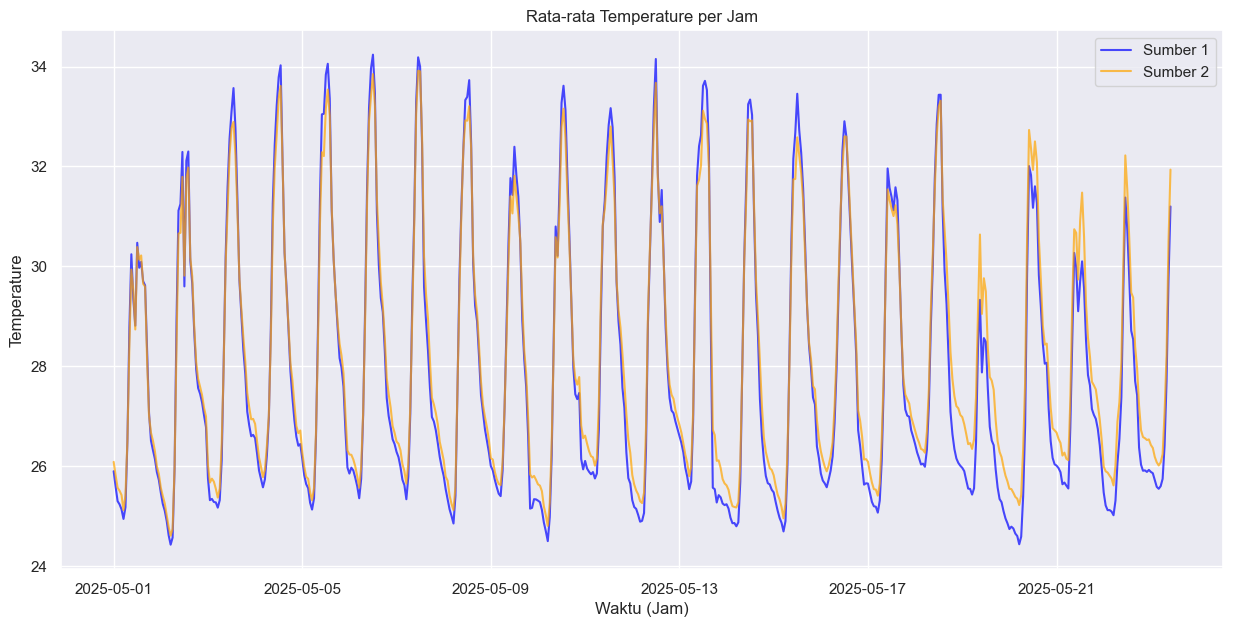

In [ ]:
import matplotlib.pyplot as plt

# Variabel pengganti untuk menentukan kolom yang akan digunakan
column_to_plot = 'temperature'  # Ubah ke 'humidity' atau 'pressure' sesuai kebutuhan

# Mengelompokkan data berdasarkan jam dan menghitung rata-rata
datacuaca['hour'] = datacuaca['timestamp'].dt.floor('h')  # Membulatkan ke jam terdekat
datacuaca2['hour'] = datacuaca2['timestamp'].dt.floor('h')

# Menghitung rata-rata per jam untuk kolom yang dipilih
datacuaca_hourly = datacuaca.groupby('hour')[column_to_plot].mean().reset_index()
datacuaca2_hourly = datacuaca2.groupby('hour')[column_to_plot].mean().reset_index()

# Plot data dari kedua DataFrame
plt.figure(figsize=(15, 7))

# Plot data dari datacuaca
plt.plot(datacuaca_hourly['hour'], datacuaca_hourly[column_to_plot], label='Sumber 1', color='blue', alpha=0.7)

# Plot data dari datacuaca2
plt.plot(datacuaca2_hourly['hour'], datacuaca2_hourly[column_to_plot], label='Sumber 2', color='orange', alpha=0.7)

# Menambahkan label, judul, dan legenda
plt.xlabel('Waktu (Jam)')
plt.ylabel(f'{column_to_plot.capitalize()}')
plt.title(f'Rata-rata {column_to_plot.capitalize()} per Jam')
plt.legend()
plt.grid(True)

# Menampilkan plot
plt.show()